<a href="https://colab.research.google.com/github/Akash12-sudo/Akash12-sudo.github.io/blob/master/ML_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [111]:
a = [[5, 2, 3], [6, 4, 1], [8, 3, 5]]
b = [[2, 4, 6], [9, 1, 5], [5, 8, 6]]

a = np.array(a)
b = np.array(b)

c = np.linalg.inv(a)
c

array([[-17.,   1.,  10.],
       [ 22.,  -1., -13.],
       [ 14.,  -1.,  -8.]])

In [112]:
train_df = pd.read_csv('train.csv')
train_df.shape

(1460, 81)

In [194]:
X = train_df.iloc[:, :-1]
Y = train_df.iloc[:, -1]

In [255]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent', verbose = 0)
X = imputer.fit_transform(X)

In [256]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [263]:
num_cols = X.shape
for col_no in range(0, num_cols[1]):
  col = X[:, col_no]
  if col.dtype == 'object':
    X[:, col_no] = encoder.fit_transform(X[:, col_no])

In [264]:
X

array([[0, 5, 3, ..., 2, 8, 4],
       [1, 0, 3, ..., 1, 8, 4],
       [2, 5, 3, ..., 2, 8, 4],
       ...,
       [1457, 6, 3, ..., 4, 8, 4],
       [1458, 0, 3, ..., 4, 8, 4],
       [1459, 0, 3, ..., 2, 8, 4]], dtype=object)

In [297]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [298]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_pca = pca.fit_transform(X)

In [300]:
X_pca

array([[ 2.20255563, -0.08861704, -1.86032068, ..., -0.64855253,
         0.28027966, -0.19001069],
       [ 0.32937978, -1.74439903,  2.14083276, ...,  0.93110049,
        -0.30610165,  0.70871959],
       [ 2.87878157,  0.15782187, -0.94713101, ..., -0.41481523,
         0.36348753,  0.26426233],
       ...,
       [ 1.25439686,  2.99331568,  0.51119035, ..., -0.33389065,
        -1.12898184,  0.55979922],
       [-3.04635004, -2.35738873,  2.24713698, ..., -0.24199614,
         0.32066299, -0.05775462],
       [-1.02020069, -2.37718323,  2.32184514, ...,  1.00927749,
        -0.54865757, -0.38865845]])

In [301]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.2, random_state = 25)

In [302]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [303]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective = 'reg:squarederror', random_state = 42)
xgb_model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=42)

In [304]:
y_test

array([320000, 339750, 185750, 266000, 180500, 189000, 180000, 232600,
       163990, 167240, 424870, 147400, 350000, 230000, 320000, 153900,
       177000, 119500, 170000, 263000, 140000, 446261, 200000, 156932,
       117000,  89500, 148500, 274900, 284000, 118400, 225000, 194500,
       132000, 326000, 176000, 197000, 260000, 162000,  93000, 129000,
       172500, 192000, 187000, 132500, 170000, 195000, 170000, 193000,
        97000, 240000, 180000, 130000, 118500, 205000, 192500, 116000,
       185000,  97000, 189000, 265979, 110000, 169500,  85000, 224000,
       250000, 160000, 159500, 261500, 165000, 120000, 150500, 341000,
       260000, 235000, 206000, 128000, 105000, 129500, 125000, 745000,
       181000,  40000, 140000, 144000, 205000, 156000, 216500, 160000,
       611657, 102000, 260000, 149000, 345000, 132500, 271000, 217500,
       222000, 194000, 140000, 171000, 159000, 193000, 172400, 165150,
       142000, 167500, 125500, 108000, 155000, 185000, 195000, 270000,
      

In [305]:
y_pred = xgb_model.predict(X_test)

In [306]:
y_pred

array([361966.6  , 307283.28 , 172310.08 , 265815.97 , 163169.03 ,
       196375.83 , 203416.16 , 233829.5  , 178741.92 , 178765.64 ,
       388526.78 , 161067.61 , 308503.16 , 242333.58 , 366764.75 ,
       161008.73 , 142261.58 , 123436.53 , 169691.38 , 239312.48 ,
       143499.2  , 418483.6  , 203501.47 , 175296.62 , 112168.945,
       102571.58 , 142157.12 , 320022.75 , 271791.1  , 120232.84 ,
       183311.2  , 201198.73 , 116579.336, 363652.03 , 171026.78 ,
       244021.98 , 266519.   , 186366.12 , 101503.66 , 135824.36 ,
       238097.7  , 193639.14 , 185254.72 , 140429.86 , 183206.25 ,
       185650.42 , 162262.53 , 194566.48 ,  98877.94 , 222807.98 ,
       189332.56 , 119263.14 , 104686.64 , 200413.8  , 213378.19 ,
       108558.836, 190379.84 , 116797.164, 178816.98 , 184251.66 ,
       106884.65 , 145647.89 ,  95346.3  , 199686.77 , 275161.5  ,
       163563.86 , 144211.17 , 253632.61 , 184361.47 , 111759.97 ,
       156990.83 , 302322.47 , 237791.75 , 236453.34 , 189578.

In [307]:
# evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2s = r2_score(y_test, y_pred)
print(r2s)

1132132002.1566691
0.8539285769610905


In [313]:
y_test[55], y_pred[55]

(116000, 108558.836)

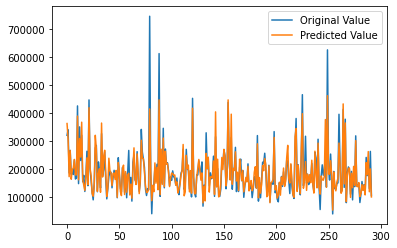

In [312]:
plt.plot(y_test, label = 'Original Value')
plt.plot(y_pred, label = 'Predicted Value')
plt.legend()
plt.show()